In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load all the batches

b1_df = pd.read_excel('./batch_results/summaries_batch1.xlsx')
b2_df = pd.read_excel('./batch_results/summaries_batch2.xlsx')
b3_df = pd.read_excel('./batch_results/summaries_batch3.xlsx')
b4_df = pd.read_excel('./batch_results/summaries_batch4.xlsx')
b5_df = pd.read_excel('./batch_results/summaries_batch5.xlsx')
b6_df = pd.read_excel('./batch_results/summaries_batch6.xlsx')

In [4]:
concatenated_df = pd.concat([b1_df, b2_df, b3_df, b4_df, b5_df, b6_df])

In [6]:
concatenated_df.head() 

,Index,ArgGraph,Model 1,Approach 1,Model 2,Approach 2,Question,Summary 1,Summary 2,Source,UserAnswer,ModelOut,ApproachOut
0,1,www.kialo.com/all-us-and-eu-sanctions-imposed-...,BART-CNN,depth_first,LLAMA2,json,"Consider the summaries related to the topic ""a...",Sanctions to Russia have cut growth in Europe ...,\nThe debate revolves around the effectiveness...,Discussion Title: All US and EU sanctions impo...,_x000D_\nThe debate revolves around the effect...,LLAMA2,json
1,2,www.kialo.com/are-countries-right-to-dispel-ru...,GPT-4,depth_first,LLAMA2,depth_first,"Consider the summaries related to the topic ""a...",Countries expelled Russian diplomats after the...,\nDebate surrounds expelling Russian diplomats...,Discussion Title: Are Countries Right to Dispe...,_x000D_\nDebate surrounds expelling Russian di...,LLAMA2,depth_first
2,3,www.kialo.com/a-permanent-venue-for-the-olympi...,BART-CNN,depth_first,LLAMA2,depth_first,"Consider the summaries related to the topic ""a...",The International Olympic Committee (IOC) shou...,\nThe proposal for a permanent venue for the O...,Discussion Title: A permanent venue for the Ol...,_x000D_\nThe proposal for a permanent venue fo...,LLAMA2,depth_first
3,4,www.kialo.com/are-all-our-actions-selfish-to-s...,LLAMA2,depth_first,LLAMA2,divide_conquer,"Consider the summaries related to the topic ""a...",\nHere's a 90-word summary of the debate:\n\nI...,"\nPeople can act selflessly and selfishly, wit...",Discussion Title: Are all our actions selfish ...,_x000D_\nHere's a 90-word summary of the debat...,LLAMA2,divide_conquer
4,5,www.kialo.com/all-cars-should-be-run-at-high-r...,BART-CNN,divide_conquer,GPT-4,depth_first,"Consider the summaries related to the topic ""a...",All cars should be run at very high revs (at t...,"To prevent carbon buildup, some advocates reco...",Discussion Title: All cars should be run at hi...,"To prevent carbon buildup, some advocates reco...",GPT-4,depth_first


In [7]:
len(concatenated_df)

1400

In [28]:
## check for gpt-4 results

gpt_4_records = concatenated_df[(concatenated_df['Model 1'] == 'GPT-4') & (concatenated_df['Model 2'] == 'GPT-4')]

In [14]:
gpt_4_records['ApproachOut'].value_counts()

ApproachOut
json              58
depth_first       49
divide_conquer    43
Name: count, dtype: int64

<Axes: xlabel='ApproachOut'>

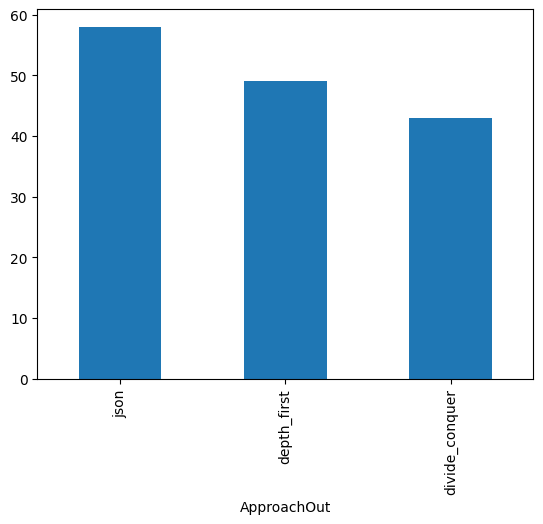

In [16]:
gpt_counts = gpt_4_records['ApproachOut'].value_counts()
gpt_counts.plot(kind='bar')

In [19]:
!pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 435.7 kB/s eta 0:00:36
    --------------------------------------- 0.3/15.7 MB 2.7 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/15.7 MB 6.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/15.7 MB 8.0 MB/s eta 0:00:02
   ----- ---------------------------------- 2.3/15.7 MB 9.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/15.7 MB 9.9 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/15.7 MB 10.4 MB/s eta 0:00:02
   ---------- ----------------------------- 4.3/15.7 MB 10.9 MB/s eta 0:00:02
   ------------ --------------------------- 4.9/15.7 MB 11.2 MB/s eta 0:00:01
   -------------- ------------------------- 5.6/15.7 MB 11.5 MB/s eta 0:00:01
   -----------

In [53]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
# Count occurrences of values in the 'Category' column
gpt_counts = gpt_4_records['ApproachOut'].value_counts().reset_index()
gpt_counts.columns = ['Approach', 'Count']
fig = px.bar(gpt_counts, x='Approach', y='Count', labels={'Approach': 'Approach', 'Count': 'Count'}, title='GPT-4 results', height=500, width=500)
fig.update_layout(bargap=0.60)
fig.show()

In [38]:
## check for llama results

llama2_records = concatenated_df[(concatenated_df['Model 1'] == 'LLAMA2') & (concatenated_df['Model 2'] == 'LLAMA2')]
llama2_records.head(3)

,Index,ArgGraph,Model 1,Approach 1,Model 2,Approach 2,Question,Summary 1,Summary 2,Source,UserAnswer,ModelOut,ApproachOut
3,4,www.kialo.com/are-all-our-actions-selfish-to-s...,LLAMA2,depth_first,LLAMA2,divide_conquer,"Consider the summaries related to the topic ""a...",\nHere's a 90-word summary of the debate:\n\nI...,"\nPeople can act selflessly and selfishly, wit...",Discussion Title: Are all our actions selfish ...,_x000D_\nHere's a 90-word summary of the debat...,LLAMA2,divide_conquer
25,26,www.kialo.com/are-humans-evil-9827,LLAMA2,divide_conquer,LLAMA2,json,"Consider the summaries related to the topic ""a...",\nHumans exhibit both positive and negative be...,"Sure, here is a summary of the debate in 90 wo...",Discussion Title: Are Humans Evil?\n\n1. Human...,"Sure, here is a summary of the debate in 90 wo...",LLAMA2,json
28,29,www.kialo.com/all-drugs-should-be-legalized-7100,LLAMA2,depth_first,LLAMA2,divide_conquer,"Consider the summaries related to the topic ""a...",\nHere's a 90-word summary of the debate on dr...,\nThe debate over drug legalization balances i...,Discussion Title: All drugs should be legalize...,_x000D_\nHere's a 90-word summary of the debat...,LLAMA2,divide_conquer


In [39]:
llama2_records['ApproachOut'].value_counts()

ApproachOut
json              74
divide_conquer    45
depth_first       31
Name: count, dtype: int64

In [54]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
# Count occurrences of values in the 'Category' column
llama_counts = llama2_records['ApproachOut'].value_counts().reset_index()
llama_counts.columns = ['Approach', 'Count']
fig = px.bar(llama_counts, x='Approach', y='Count', labels={'Approach': 'Approach', 'Count': 'Count'}, title='LLAMA-2 results', height=500, width=500)
fig.update_layout(bargap=0.60)
fig.show()

In [47]:
## check for bart results

bart_records = concatenated_df[(concatenated_df['Model 1'] == 'BART-CNN') & (concatenated_df['Model 2'] == 'BART-CNN')]
bart_records.head(3)

,Index,ArgGraph,Model 1,Approach 1,Model 2,Approach 2,Question,Summary 1,Summary 2,Source,UserAnswer,ModelOut,ApproachOut
95,96,www.kialo.com/are-homeopathic-remedies-fraudul...,BART-CNN,depth_first,BART-CNN,divide_conquer,"Consider the summaries related to the topic ""a...","A positive unreasonable belief, otherwise know...",Proponents of homeopathy claim that greater di...,Discussion Title: Are Homeopathic Remedies Fra...,"A positive unreasonable belief, otherwise know...",BART-CNN,depth_first
141,142,www.kialo.com/anarchy-is-the-only-ethical-syst...,BART-CNN,depth_first,BART-CNN,divide_conquer,"Consider the summaries related to the topic ""a...",Anarchy is the only ethical system of society....,A utopian Communist Government is more ethical...,Discussion Title: Anarchy is the only ethical ...,Anarchy is the only ethical system of society....,BART-CNN,depth_first
152,153,www.kialo.com/are-problems-in-developing-count...,BART-CNN,depth_first,BART-CNN,divide_conquer,"Consider the summaries related to the topic ""a...",Problems in the developing world are worse tha...,"For various structural reasons, governments in...",Discussion Title: Are problems in developing c...,"For various structural reasons, governments in...",BART-CNN,divide_conquer


In [48]:
bart_records['ApproachOut'].value_counts()

ApproachOut
depth_first       32
divide_conquer    18
Name: count, dtype: int64

In [55]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
# Count occurrences of values in the 'Category' column
bart_counts = bart_records['ApproachOut'].value_counts().reset_index()
bart_counts.columns = ['Approach', 'Count']
fig = px.bar(bart_counts, x='Approach', y='Count', labels={'Approach': 'Approach', 'Count': 'Count'}, title='BART results', height=500, width=500)
fig.update_layout(bargap=0.60)
fig.show()

In [58]:
# Models
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
# Count occurrences of values in the 'Category' column
model_counts = concatenated_df['ModelOut'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']
fig = px.bar(model_counts, x='Model', y='Count', labels={'Model': 'Model', 'Count': 'Count'}, title='Model results', height=500, width=500)
fig.update_layout(bargap=0.60)
fig.show()

In [62]:
# Approaches

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
# Count occurrences of values in the 'Category' column
approach_counts = concatenated_df['ApproachOut'].value_counts().reset_index()
approach_counts

,ApproachOut,count
0,depth_first,499
1,divide_conquer,463
2,json,438


In [63]:
approach_counts.columns = ['Approach', 'Count']
fig = px.bar(approach_counts, x='Approach', y='Count', labels={'Approach': 'Approach', 'Count': 'Count'}, title='Approach results', height=500, width=500)
fig.update_layout(bargap=0.60)
fig.show()

In [68]:
concatenated_df.groupby(['ModelOut','ApproachOut'])['Index'].count()

ModelOut  ApproachOut   
BART-CNN  depth_first        87
          divide_conquer     81
GPT-4     depth_first       222
          divide_conquer    202
          json              228
LLAMA2    depth_first       190
          divide_conquer    180
          json              210
Name: Index, dtype: int64

In [70]:
import pandas as pd
import plotly.express as px

# Group by 'ModelOut' and 'ApproachOut', and count occurrences of 'Index'
grouped_df = concatenated_df.groupby(['ModelOut', 'ApproachOut'])['Index'].count().reset_index()
grouped_df.columns = ['ModelOut', 'ApproachOut', 'Count']

# Create a bar chart using Plotly
fig = px.bar(grouped_df, x='ModelOut', y='Count', color='ApproachOut',
             labels={'ModelOut': 'Model', 'Count': 'Count', 'ApproachOut': 'Approach'},
             title='Count of Index by Model and Approach')
fig.update_layout(bargap=0.60)
fig.show()

In [73]:
import pandas as pd
import plotly.express as px

# Group by 'ModelOut' and 'ApproachOut', and count occurrences of 'Index'
grouped_df = concatenated_df.groupby(['ModelOut', 'ApproachOut'])['Index'].count().reset_index()
grouped_df.columns = ['ModelOut', 'ApproachOut', 'Count']

# Create a histogram using Plotly
fig = px.histogram(grouped_df, x='ModelOut', y='Count', color='ApproachOut',
                   labels={'ModelOut': 'Model', 'Count': 'Count', 'ApproachOut': 'Approach'},
                   title='Count of Index by Model and Approach',
                   histfunc='sum',  # Aggregate counts by summing
                   barmode='group')  # Group bars
fig.update_layout(bargap=0.60)
fig.show()